<a href="https://colab.research.google.com/github/JevertonFlores/data_analytics_python/blob/main/Data_Analytics_Data_Viking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [134]:
!pip install polars

In [135]:
import pandas as pd
import numpy as np
import polars as pl
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 100)

In [136]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Load Data**

In [137]:
df = pd.read_csv('/content/drive/MyDrive/Bases de Dados/dados_enem_2021_BA.csv')

# Microdados ENEM

**Grupos de variáveis**

- Dados do participante
- Dados da escola
- Dados do local de aplicação da prova
- Dados da prova objetiva
- Dados da redação
- Dados do questionário socioeconômico


# **Inspeção dos Dados (Data Discovery)**

In [138]:
# Leitura das cinco primeiras linhas

df.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,210051128744,2021,4,F,1,3,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927200,Ruy Barbosa,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,507.6,539.2,494.6,413.3,BAEDEBDECCEAEDDCBDEDAEECEEEDBDECBDCECBCCDABED,EEEBAABCBCDBEAEBEACEDDEDECACBDBCDACECDAECBCBD,99999ACAEEEEBDEACDACDEABCEABBDEDBAEEBDEEACDBAC...,BACEACDACBAAAEDCECABBACDCDBBA.CEABCDADADBECBE,1,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,80.0,120.0,80.0,80.0,20.0,380.0
1,210054173438,2021,5,F,1,2,1,2,0,2,1.0,0,2927408.0,Salvador,29.0,BA,1.0,1.0,1.0,2927408,Salvador,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,210052118573,2021,3,F,1,3,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2903201,Barreiras,29,BA,1,1,1,1,912.0,882.0,891.0,901.0,439.6,437.7,455.9,446.2,BCEDEACAEDCEDCBDDCCAADABADDEBEECBACDCCABBDCCA,AAEADCDCAAADCBBBAABBEAEDABCDAACDDCBDAAABAABBB,EDBEC99999DDAAEBBDCDBBAABDECAADAEACCDABCEABABE...,EBBEBDCCDDCDCBADABBBCCEABDADCBCCACBDACDCDADCE,0,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,80.0,120.0,80.0,100.0,80.0,460.0
3,210052350230,2021,10,F,1,2,1,1,8,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2928802,Santo Estêvão,29,BA,1,1,1,1,911.0,880.0,890.0,902.0,548.1,619.5,676.3,386.6,CCAECCADEAADDEDDEECEDDEADDDCACDEDCDCDEADBEDDE,DBBEADDCABABCECEAEBEAEDCBCAEABEEDEBBEAABCBDCD,ABCCA99999DDCACDCACABBEAAEBDAEEBDEEAADACEEDDDB...,CAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,120.0,120.0,100.0,120.0,120.0,580.0
4,210053156861,2021,9,M,1,2,1,1,5,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2910800,Feira de Santana,29,BA,1,1,1,1,1014.0,1000.0,1004.0,1010.0,465.2,613.1,522.1,579.6,CDCCBDBBDCBACEBDACBCACADBCBECCEBCDDEBDACEECCD,CCBAADECCBACBECCBEADAEBEACBEBBEADEBBABDACDEBC,BADCE99999DABAABBABBBCEDBDCDABEABCBBDCACBABAAA...,CCBACBBCCCCEDDDDCBCCDCACCCBBBDDDBCBADDBCABACA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,100.0,120.0,100.0,120.0,100.0,540.0


In [139]:
# Leitura das cinco últimas linhas

df.tail()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
266189,210051432069,2021,12,M,1,3,1,1,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2900702,Alagoinhas,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266190,210051106175,2021,14,M,2,2,1,1,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2918407,Juazeiro,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266191,210051995005,2021,11,M,0,2,1,1,12,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266192,210053234415,2021,12,M,2,2,1,1,15,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266193,210054027870,2021,5,F,1,2,1,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [140]:
# Quantidade de linhas e colunas do Dataset
# O resultado é uma tupla - podemos verificar com a função type()

df.shape

(266194, 51)

In [141]:
# Sumário do Dataset
# Número de valores não nulos, data type da coluna, memory usage

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266194 entries, 0 to 266193
Data columns (total 51 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   NU_INSCRICAO            266194 non-null  int64  
 1   NU_ANO                  266194 non-null  int64  
 2   TP_FAIXA_ETARIA         266194 non-null  int64  
 3   TP_SEXO                 266194 non-null  object 
 4   TP_ESTADO_CIVIL         266194 non-null  int64  
 5   TP_COR_RACA             266194 non-null  int64  
 6   TP_NACIONALIDADE        266194 non-null  int64  
 7   TP_ST_CONCLUSAO         266194 non-null  int64  
 8   TP_ANO_CONCLUIU         266194 non-null  int64  
 9   TP_ESCOLA               266194 non-null  int64  
 10  TP_ENSINO               84388 non-null   float64
 11  IN_TREINEIRO            266194 non-null  int64  
 12  CO_MUNICIPIO_ESC        47820 non-null   float64
 13  NO_MUNICIPIO_ESC        47820 non-null   object 
 14  CO_UF_ESC           

In [142]:
# Nome das colunas

df.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO'],
      dtype='object')

In [143]:
# Verificar missing values

# ds.isna verificar se o valor é nulo ou não, retornando TRUE ou FALSE, sendo TRUE = 1 e FALSE = 0
# Utilizamos o .sum para somar o resultado do comando anterir
# O df.shape traz a quantidade total de linhas e colunas, então referenciamos a posição [0] para pegar o total de linhas. Esse resultado é utilizado na divisão para encontrarmos o $
# Por fim, o .sort_values é utilizado para ordenar as as colunas com o maior % de missing values

(df.isna().sum() / df.shape[0] * 100).sort_values(ascending = False)

TP_DEPENDENCIA_ADM_ESC    82.035658
CO_UF_ESC                 82.035658
TP_SIT_FUNC_ESC           82.035658
TP_LOCALIZACAO_ESC        82.035658
SG_UF_ESC                 82.035658
CO_MUNICIPIO_ESC          82.035658
NO_MUNICIPIO_ESC          82.035658
TP_ENSINO                 68.298309
CO_PROVA_MT               34.124736
CO_PROVA_CN               34.124736
NU_NOTA_MT                34.124736
TX_RESPOSTAS_CN           34.124736
TX_RESPOSTAS_MT           34.124736
TX_GABARITO_CN            34.124736
NU_NOTA_CN                34.124736
TX_GABARITO_MT            34.124736
TX_GABARITO_CH            30.560418
NU_NOTA_COMP2             30.560418
NU_NOTA_COMP5             30.560418
CO_PROVA_LC               30.560418
CO_PROVA_CH               30.560418
NU_NOTA_COMP4             30.560418
NU_NOTA_LC                30.560418
NU_NOTA_COMP3             30.560418
TX_RESPOSTAS_CH           30.560418
NU_NOTA_CH                30.560418
TX_RESPOSTAS_LC           30.560418
NU_NOTA_COMP1             30

In [144]:
# Sumário estatístico dos dados

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
NU_INSCRICAO,266194.0,2.100527e+11,981957.687860,2.100510e+11,2.100519e+11,2.100527e+11,2.100536e+11,2.100545e+11
NU_ANO,266194.0,2.021000e+03,0.000000,2.021000e+03,2.021000e+03,2.021000e+03,2.021000e+03,2.021000e+03
TP_FAIXA_ETARIA,266194.0,5.710166e+00,3.878161,1.000000e+00,3.000000e+00,4.000000e+00,8.000000e+00,2.000000e+01
TP_ESTADO_CIVIL,266194.0,1.048991e+00,0.411030,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00
TP_COR_RACA,266194.0,2.301832e+00,0.907761,0.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00,5.000000e+00
TP_NACIONALIDADE,266194.0,1.029787e+00,0.194507,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00
TP_ST_CONCLUSAO,266194.0,1.595810e+00,0.719902,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00
TP_ANO_CONCLUIU,266194.0,2.846845e+00,4.468500,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,1.500000e+01
TP_ESCOLA,266194.0,1.379663e+00,0.570947,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00
TP_ENSINO,84388.0,1.013272e+00,0.114438,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00


In [145]:
# Quantidade de valores únicos por coluna

df.nunique().sort_values(ascending = True)

NU_ANO                         1
SG_UF_PROVA                    1
CO_UF_PROVA                    1
TP_LINGUA                      2
TP_SEXO                        2
TP_LOCALIZACAO_ESC             2
IN_TREINEIRO                   2
TP_ENSINO                      2
TP_PRESENCA_MT                 3
TP_PRESENCA_CH                 3
TP_PRESENCA_CN                 3
TP_PRESENCA_LC                 3
TP_ESCOLA                      3
TP_SIT_FUNC_ESC                4
TP_ST_CONCLUSAO                4
TP_DEPENDENCIA_ADM_ESC         4
TP_NACIONALIDADE               5
TP_ESTADO_CIVIL                5
TP_COR_RACA                    6
TX_GABARITO_CN                 8
TX_GABARITO_CH                 8
TX_GABARITO_MT                 8
TP_STATUS_REDACAO              8
NU_NOTA_COMP2                 10
TX_GABARITO_LC                10
NU_NOTA_COMP4                 11
NU_NOTA_COMP3                 11
NU_NOTA_COMP1                 11
NU_NOTA_COMP5                 11
TP_ANO_CONCLUIU               16
CO_PROVA_C

# **Selecionando colunas**

In [146]:
# Selecionando uma coluna

df.TP_ESCOLA

0         2
1         2
2         2
3         1
4         1
         ..
266189    1
266190    1
266191    1
266192    1
266193    1
Name: TP_ESCOLA, Length: 266194, dtype: int64

In [147]:
# Distribuição de frquência por TP_ESCOLA

df.TP_ESCOLA.value_counts()

1    177170
2     76984
3     12040
Name: TP_ESCOLA, dtype: int64

In [148]:
# Selecionando uma coluna com espaço na descrição

#df['TP_ESCOLA ']

In [149]:
# Selecionando uma coluna com .loc, que seleciona a coluna pelo label
# Sintaxe: df.loc[linhas, colunas]

df.loc[:, 'TP_SEXO']

0         F
1         F
2         F
3         F
4         M
         ..
266189    M
266190    M
266191    M
266192    M
266193    F
Name: TP_SEXO, Length: 266194, dtype: object

In [150]:
# Seleciona multiplas colunas

df[['TP_SEXO', 'TP_ESCOLA']]

df.loc[:, ['TP_SEXO', 'TP_ESCOLA']]

,TP_SEXO,TP_ESCOLA
0,F,2
1,F,2
2,F,2
3,F,1
4,M,1
...,...,...
266189,M,1
266190,M,1
266191,M,1
266192,M,1


In [151]:
# Selecionar colunas pela posição

df.iloc[:, 0]   # Selecionando todas as linhas da coluna de posição 0

df.iloc[0:5, 0]   # Selecionando as cinco primeiras linhas da coluna de posição 0

0    210051128744
1    210054173438
2    210052118573
3    210052350230
4    210053156861
Name: NU_INSCRICAO, dtype: int64

In [152]:
# Selecionando colunas numéricas
# Com a função select_dtypes() podemos selecionar as colunas pelo data type delas

df.select_dtypes(include = [int, float])

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,CO_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,CO_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,210051128744,2021,4,1,3,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,2927200,29,1,1,1,1,909.0,881.0,892.0,899.0,507.6,539.2,494.6,413.3,1,1.0,80.0,120.0,80.0,80.0,20.0,380.0
1,210054173438,2021,5,1,2,1,2,0,2,1.0,0,2927408.0,29.0,1.0,1.0,1.0,2927408,29,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,210052118573,2021,3,1,3,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,2903201,29,1,1,1,1,912.0,882.0,891.0,901.0,439.6,437.7,455.9,446.2,0,1.0,80.0,120.0,80.0,100.0,80.0,460.0
3,210052350230,2021,10,1,2,1,1,8,1,NaN,0,NaN,NaN,NaN,NaN,NaN,2928802,29,1,1,1,1,911.0,880.0,890.0,902.0,548.1,619.5,676.3,386.6,0,1.0,120.0,120.0,100.0,120.0,120.0,580.0
4,210053156861,2021,9,1,2,1,1,5,1,NaN,0,NaN,NaN,NaN,NaN,NaN,2910800,29,1,1,1,1,1014.0,1000.0,1004.0,1010.0,465.2,613.1,522.1,579.6,0,1.0,100.0,120.0,100.0,120.0,100.0,540.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266189,210051432069,2021,12,1,3,1,1,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,2900702,29,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266190,210051106175,2021,14,2,2,1,1,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,2918407,29,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266191,210051995005,2021,11,0,2,1,1,12,1,NaN,0,NaN,NaN,NaN,NaN,NaN,2927408,29,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266192,210053234415,2021,12,2,2,1,1,15,1,NaN,0,NaN,NaN,NaN,NaN,NaN,2927408,29,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [153]:
# Selecionando todas as colunas que não são do tipo string

df.select_dtypes(exclude = object)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,CO_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,CO_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,210051128744,2021,4,1,3,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,2927200,29,1,1,1,1,909.0,881.0,892.0,899.0,507.6,539.2,494.6,413.3,1,1.0,80.0,120.0,80.0,80.0,20.0,380.0
1,210054173438,2021,5,1,2,1,2,0,2,1.0,0,2927408.0,29.0,1.0,1.0,1.0,2927408,29,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,210052118573,2021,3,1,3,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,2903201,29,1,1,1,1,912.0,882.0,891.0,901.0,439.6,437.7,455.9,446.2,0,1.0,80.0,120.0,80.0,100.0,80.0,460.0
3,210052350230,2021,10,1,2,1,1,8,1,NaN,0,NaN,NaN,NaN,NaN,NaN,2928802,29,1,1,1,1,911.0,880.0,890.0,902.0,548.1,619.5,676.3,386.6,0,1.0,120.0,120.0,100.0,120.0,120.0,580.0
4,210053156861,2021,9,1,2,1,1,5,1,NaN,0,NaN,NaN,NaN,NaN,NaN,2910800,29,1,1,1,1,1014.0,1000.0,1004.0,1010.0,465.2,613.1,522.1,579.6,0,1.0,100.0,120.0,100.0,120.0,100.0,540.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266189,210051432069,2021,12,1,3,1,1,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,2900702,29,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266190,210051106175,2021,14,2,2,1,1,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,2918407,29,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266191,210051995005,2021,11,0,2,1,1,12,1,NaN,0,NaN,NaN,NaN,NaN,NaN,2927408,29,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266192,210053234415,2021,12,2,2,1,1,15,1,NaN,0,NaN,NaN,NaN,NaN,NaN,2927408,29,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [154]:
# Selecionando apenas as colunas do tipo string

df.select_dtypes(include = object)

,TP_SEXO,NO_MUNICIPIO_ESC,SG_UF_ESC,NO_MUNICIPIO_PROVA,SG_UF_PROVA,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT
0,F,NaN,NaN,Ruy Barbosa,BA,BAEDEBDECCEAEDDCBDEDAEECEEEDBDECBDCECBCCDABED,EEEBAABCBCDBEAEBEACEDDEDECACBDBCDACECDAECBCBD,99999ACAEEEEBDEACDACDEABCEABBDEDBAEEBDEEACDBAC...,BACEACDACBAAAEDCECABBACDCDBBA.CEABCDADADBECBE,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB
1,F,Salvador,BA,Salvador,BA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,F,NaN,NaN,Barreiras,BA,BCEDEACAEDCEDCBDDCCAADABADDEBEECBACDCCABBDCCA,AAEADCDCAAADCBBBAABBEAEDABCDAACDDCBDAAABAABBB,EDBEC99999DDAAEBBDCDBBAABDECAADAEACCDABCEABABE...,EBBEBDCCDDCDCBADABBBCCEABDADCBCCACBDACDCDADCE,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE
3,F,NaN,NaN,Santo Estêvão,BA,CCAECCADEAADDEDDEECEDDEADDDCACDEDCDCDEADBEDDE,DBBEADDCABABCECEAEBEAEDCBCAEABEEDEBBEAABCBDCD,ABCCA99999DDCACDCACABBEAAEBDAEEBDEEAADACEEDDDB...,CAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA
4,M,NaN,NaN,Feira de Santana,BA,CDCCBDBBDCBACEBDACBCACADBCBECCEBCDDEBDACEECCD,CCBAADECCBACBECCBEADAEBEACBEBBEADEBBABDACDEBC,BADCE99999DABAABBABBBCEDBDCDABEABCBBDCACBABAAA...,CCBACBBCCCCEDDDDCBCCDCACCCBBBDDDBCBADDBCABACA,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
266189,M,NaN,NaN,Alagoinhas,BA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266190,M,NaN,NaN,Juazeiro,BA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266191,M,NaN,NaN,Salvador,BA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266192,M,NaN,NaN,Salvador,BA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [155]:
# Selecionando apenas colunas categóricas
# Função .columuns.tolist() transforma as colunas em uma lista para apresentar o resultado

cat_cols = df.select_dtypes(include = object).columns.tolist()

cat_cols

['TP_SEXO',
 'NO_MUNICIPIO_ESC',
 'SG_UF_ESC',
 'NO_MUNICIPIO_PROVA',
 'SG_UF_PROVA',
 'TX_RESPOSTAS_CN',
 'TX_RESPOSTAS_CH',
 'TX_RESPOSTAS_LC',
 'TX_RESPOSTAS_MT',
 'TX_GABARITO_CN',
 'TX_GABARITO_CH',
 'TX_GABARITO_LC',
 'TX_GABARITO_MT']

In [156]:
# Selecionando apenas colunas numétricas e apresentando em lista

df.select_dtypes(include = [int, float]).columns.to_list()

['NU_INSCRICAO',
 'NU_ANO',
 'TP_FAIXA_ETARIA',
 'TP_ESTADO_CIVIL',
 'TP_COR_RACA',
 'TP_NACIONALIDADE',
 'TP_ST_CONCLUSAO',
 'TP_ANO_CONCLUIU',
 'TP_ESCOLA',
 'TP_ENSINO',
 'IN_TREINEIRO',
 'CO_MUNICIPIO_ESC',
 'CO_UF_ESC',
 'TP_DEPENDENCIA_ADM_ESC',
 'TP_LOCALIZACAO_ESC',
 'TP_SIT_FUNC_ESC',
 'CO_MUNICIPIO_PROVA',
 'CO_UF_PROVA',
 'TP_PRESENCA_CN',
 'TP_PRESENCA_CH',
 'TP_PRESENCA_LC',
 'TP_PRESENCA_MT',
 'CO_PROVA_CN',
 'CO_PROVA_CH',
 'CO_PROVA_LC',
 'CO_PROVA_MT',
 'NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'NU_NOTA_MT',
 'TP_LINGUA',
 'TP_STATUS_REDACAO',
 'NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5',
 'NU_NOTA_REDACAO']

# **Aplicando Filtros**

1) Existe diferença nas notas de matemática entre alunos de escola pública ou privada?

In [157]:
# Alunos de escola pública - nota média

df.query('TP_ESCOLA == 2').NU_NOTA_MT.mean()

487.37504991538157

In [158]:
# Alunos de escola privada - nota média

df.query('TP_ESCOLA == 3').NU_NOTA_MT.mean()

579.8338996340826

In [159]:
# Alunos escola pública - média e mediana

df.query('TP_ESCOLA == 2').NU_NOTA_MT.agg([np.mean, np.median])

mean      487.37505
median    468.90000
Name: NU_NOTA_MT, dtype: float64

In [160]:
# Alunos escola privada - média e mediana

df.query('TP_ESCOLA == 3').NU_NOTA_MT.agg([np.mean, np.median])

mean      579.8339
median    581.6000
Name: NU_NOTA_MT, dtype: float64

In [161]:
# Filtro com 1 condição. O comando .sample() traz uma amostra aleatória da base de dados

df.query('TP_SEXO == "M"').sample(5)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
16484,210052359457,2021,4,M,1,3,1,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2905008,Caculé,29,BA,1,1,1,1,911.0,880.0,890.0,902.0,545.0,627.4,577.5,645.7,EDCADBCBACBCCEACECDBDDADBADBCCBDACDAEBBBBEEDC,EBABDAECBBABEEBCAAACAEAEACAEACDCDABBBCDBCBAEC,AACEA99999BAEACDAACDBBCEDCBDACEADEBADDACBDDDEB...,BCABDEBCDDDBEBDDCCDEEBEAEBBCDEDBCABBDEBBCECBE,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,120.0,40.0,120.0,120.0,140.0,540.0
5874,210053356457,2021,3,M,0,2,1,2,0,2,1.0,0,2926004.0,Remanso,29.0,BA,2.0,1.0,1.0,2910800,Feira de Santana,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112949,210054168082,2021,7,M,1,2,1,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2903201,Barreiras,29,BA,1,1,1,1,911.0,880.0,890.0,902.0,426.1,548.8,452.0,478.7,CDBCBBBEDCEECEDCADACEDDEDAAECEEBADABBCBECEEEE,EBBBEEECBEABEEEBAEEEACDEABBBBBBBBBBEEABBAE.BC,DAEAE99999DDEBABBCACCBECCCCCCCEAECBADEABECDEEE...,BCAEEEABBBEBEEEABBEEEEEDBEBACBCEEBBBBCCEEEEEA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,160.0,200.0,160.0,160.0,160.0,840.0
226444,210053230953,2021,3,M,1,3,1,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,1,1,1,1,912.0,882.0,891.0,901.0,493.6,532.3,562.1,585.1,CAECBDEEECCEDDBDCAADCAACAABDEEBBBACCECABEBACE,CAEEAACBCAEBDABCEBAABDADBEBBCDBDBBACBEABDCCBB,EBAAB99999DCCADCADACCAEDDDDADAAADBDBBABCECDDAA...,DADACBACABCAACEAABEBBDEDCEBDBCCADDBCDBABEBCCB,0,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,180.0,120.0,140.0,160.0,720.0
164088,210052068093,2021,3,M,1,3,1,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2910057,Dias d'Ávila,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,561.1,612.7,568.7,661.7,CBEBABDEDDAECCAEBDDABECEEBECAAECDCADCCBABDEDA,BBEBCAEABADBCADCBAACEDEBACABBDBAABEEBBEECBCDA,BDBAD99999CDBDEAEDBBDBBCCBADEBDDBCEDCEEAECCEAC...,DAEEAEEDDECCDBCBCCACAAADDBAECBACBBEBDCCCDBCDD,0,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,160.0,120.0,100.0,120.0,0.0,500.0


In [162]:
# Validando a consulta
# .unique(): retorna os valores únicos de uma determinada coluna

df.query('TP_SEXO == "M"')['TP_SEXO'].unique()

array(['M'], dtype=object)

In [163]:
# Filtro com 2 condições utilizando o operador E (&). Neste caso, colocamos as condições dentro de parênteses

df.query('(TP_SEXO == "M") & (IN_TREINEIRO == 1)').sample(5)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
121783,210054121928,2021,1,M,1,1,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2928703,Santo Antônio de Jesus,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,600.1,566.2,591.0,712.7,ACDDCCBDBADADACCABADABBDABCCCBAEEECEBABDECEDE,BECCEDABDBDDABBACBCABDEECBAEDDAADECBCAEECDCAE,CAAEB99999CDCDEADBECBDADCABBEDCAECDACAADBABDCC...,DDCDDDCEAEBBDEBABDAEABEDBDBCDBCBACDCEBEBAAAEB,0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,140.0,200.0,160.0,140.0,120.0,760.0
6398,210053775449,2021,2,M,1,3,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2933604,Xique-Xique,29,BA,1,1,1,1,912.0,882.0,891.0,901.0,399.9,497.8,475.0,461.8,ADEBBBBDEECEBACCACECDDECBBBCBEDCDAAEEABACCDAD,DABBACBAAAABCACDABABADBDBBADBAAADCCEBABACAACA,99999ABACBDCEBBBBDECBBEAACDDADBBABDAEAAADCBCAC...,ABDDEADBCBA*BEBACBBCDDCEBCBABABBDBACBCAEBDCDB,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,200.0,200.0,180.0,180.0,200.0,960.0
35909,210052095125,2021,1,M,1,3,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2917607,Jaguaquara,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,616.7,600.5,559.2,619.9,BCCDCCBCBACACBACDDEAABDDADCCECABECBABDBBEBECD,BAECDADBAADBEBAAEDEABBACCBEBBECABEEBBAEDAEEBC,EBABB99999BDDDEABEECEEDDCADCBDEECCCAECBDDECAED...,DDABCBCCACEBBDBAADBBBABBBADBDDCCCADCCDEBEABEA,0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,120.0,160.0,120.0,140.0,140.0,680.0
38199,210051273295,2021,1,M,1,3,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2933000,Valente,29,BA,1,1,1,1,912.0,882.0,891.0,901.0,485.1,581.6,524.2,420.3,DCDAEEEAEECDBBCDCADBCEDCDCDDEDBBEDBACCCC*ECAA,EBDAAAEBEAECEABAACBBADBCBABDABCDEDEDBEDBCAACB,ACBBB99999DABEEDBAABBEEABBDBDBDBDEECDAEADEACAA...,CC*BCBECCBBCCBACACCCABCAACBDBCDEDCCCAABCBBCBB,0,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,120.0,120.0,120.0,120.0,600.0
48324,210052025453,2021,1,M,1,1,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2922409,Mutuípe,29,BA,1,1,1,1,911.0,880.0,890.0,902.0,472.6,400.8,416.1,466.5,CCBBDDEBDDAABEACECAECEDDBCCCBEDCEDDBDADCEECEA,CBADEEBBC*DCDDACACEDCBDAACCDBCCECEABDDBAAEBCD,BCCBA99999BACDADEBDACBEEEACCBADADBBECAEDBAAADA...,DAAEBCBACDEEBCCCADACDEAECCBDBABCAECCCDBEBDCAB,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,80.0,120.0,100.0,120.0,0.0,420.0


In [164]:
# Filtro com 2 condições utilizando o operador OU (|).

df.query('(TP_SEXO == "M") | (IN_TREINEIRO == 1)').sample(10)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
230236,210053253809,2021,1,M,1,3,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2909802,Cruz das Almas,29,BA,1,1,1,1,911.0,880.0,890.0,902.0,510.7,414.3,396.5,558.8,EADDCDBBEEDCDECECECCBCAABBBEACEBECADAEAEBECCD,DABDEACDBDCEDACACDDECEBDBAABECCDBDBBDEADBBDEC,CBAED99999DACDDBBAEDDCEEADCBACDBDCBBDCEACABDDA...,BADDBADECBDDCEDBEACDBBECACCABCDDBDCBACBECDBCD,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,120.0,120.0,120.0,120.0,80.0,560.0
152433,210052605876,2021,10,M,3,3,1,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2906873,Capim Grosso,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212769,210052648482,2021,3,M,1,2,1,2,0,3,1.0,0,2919207.0,Lauro de Freitas,29.0,BA,4.0,1.0,1.0,2919207,Lauro de Freitas,29,BA,1,1,1,1,911.0,880.0,890.0,902.0,616.2,491.8,604.9,673.8,CCABDCABEEEDECDDCACCBDAADADCDCDDEDAABCABBECEE,DCBAAADCABDBEEBBDBECADBEEBDDCAABDDBCDCDACCDAB,AABCA99999DDCADDABDDBCEABBCBACEADEDBCDACEADDDD...,BEDCACBDADDDAEDDCDCAEADEBDABBCBCCDBAEDBDBECEA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,100.0,160.0,120.0,140.0,160.0,680.0
147075,210052573557,2021,2,M,1,3,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,413.4,417.0,420.4,646.2,DEBBBEBADBCCECEDAE*DDBABCBEDECABCCCEEDDDAAABE,AAABDCEABCBAADDBADEACCABAABDEDAABABCDAAAAEBCB,EAACE99999ACDEC.DABBACEDCBACDDABDAEAADBCBACAAE...,DECADBDEDEDBBBBEECADBBADBEECEBCCBDBBDCBBAEABA,0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,120.0,180.0,120.0,120.0,200.0,740.0
36112,210053134253,2021,3,M,1,3,1,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2921203,Miguel Calmon,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,436.5,478.4,517.3,481.9,BDBCCBCCCCDEACDDCBBDDDCEBDBADAEAECCDBDDDDEBCB,BEEEDAAABADBEDAABCBBDBAECBEDCEBDDBBADEAAABDCB,99999ECAAAABCDEADBBDDADCEDDCEACBACEACDBBDACADB...,CDCBDCBCBBCDCBDCECBCDDCCBBDBBCBDDCDDDCECBDDCA,1,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,120.0,120.0,120.0,120.0,120.0,600.0
165154,210053654396,2021,4,M,1,2,1,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,1,1,1,1,912.0,882.0,891.0,901.0,506.3,643.2,541.8,668.3,DCDDBADBEABBDCCACDCCCEADAAEAECCDBABCCDDEDCCAD,EAADEAEBBACBDABEEBBAAAEDBBAECCADACEADABECAEAB,EBAAB99999ECBACCBDABCDEABBAEDBABDDACBABCDCAACE...,DCCAEBBCDBCDEEBAABEEDEADDCBDBDDAEDABABCBCCBCC,0,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,140.0,200.0,140.0,140.0,140.0,760.0
115354,210054163718,2021,1,M,1,4,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2928703,Santo Antônio de Jesus,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,569.9,588.2,563.7,590.1,ABCECCCCCCCB

**Outra opção de sintaxe**

In [165]:
# Cria uma máscara booleana

mask = df.TP_SEXO == 'M'

In [166]:
# Selecionando os dados com base na máscara criada

df[mask].sample(5)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
209803,210053202000,2021,4,M,1,3,1,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2903201,Barreiras,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,516.4,601.9,598.5,588.2,ACDBADCBCBDCCACBCDBCBADDBBDDCBEDACADCCABBDCCA,BDECCAEBAAECCADAADADDDEBACABDABAADBCBBACCABBA,CBAAC99999CDBDDAD.BBDABDCBCDADDBBEADCE.AA.CDAA...,DBDEBABDCBBEBBABADBCBDBACAABDBDCBACACCCBCBCBC,0,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,100.0,120.0,120.0,140.0,160.0,640.0
168687,210054118935,2021,11,M,1,2,1,1,11,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2919207,Lauro de Freitas,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,646.5,652.1,623.5,784.6,ADBACDADBBCDABECBABAABBDCDCCABCBECBBBDAAEDEAE,EADCDAADCEEDEBBACBAABEEECAECBDCAAAEBBABADDEBB,CAABE99999BCCDEADCEDBEDDEABBEDDDBCDECAABBAAADC...,DDCADDDEABDCEBBDDDACECEDCADCDBCACCDDAEEBAEEEB,0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,160.0,200.0,180.0,200.0,180.0,920.0
155247,210052989440,2021,3,M,1,3,1,2,0,2,1.0,0,2931004.0,Tanhaçu,29.0,BA,2.0,1.0,1.0,2933307,Vitória da Conquista,29,BA,1,1,1,1,911.0,880.0,890.0,902.0,441.8,434.1,480.6,502.2,CBABDDEECEABBCBCAACECADADBECCEAE.CACBBDEEEEDC,CAABABCDABDCEEEEBABAAADCEECDBCBCABEADECDCBCED,99999EEBDECBAAEBADBCDACAEEAEDCEADEEADAECECDBEC...,EACBCDBAACEDDCBABEBACACBECBDAEABAAEDDDCABEDCD,1,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,140.0,180.0,120.0,160.0,200.0,800.0
176288,210053680189,2021,2,M,1,2,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2903201,Barreiras,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,372.3,546.6,496.1,496.8,BAAEEBDACDDDCCDABAECAADAECCADCCDACABEDAEBABCE,CEECEAACCAEBBADBABEACBABADAEAABAAABDABACCAADA,99999AAABCCEBBCCAEABDBCDBDBBDBDBBCAECBCAACDBCA...,BAEEEEEECABBCEBACABBABCEBDAABAABABABACAABBBCB,1,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,120.0,120.0,120.0,120.0,120.0,600.0
233071,210051299209,2021,15,M,2,3,1,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2926301,Riachão do Jacuípe,29,BA,1,1,1,1,911.0,880.0,890.0,902.0,448.9,520.9,378.3,406.4,CCDDBAECEAECADCEECABCEBCACBCBCEBDCDBCBAADCDEA,EBAAAEEEBDACCEBEABAADECAAECABABEAABCBADABCBDC,99999CEAAEDAAEAEDBCBCEBEDDAEAEAACBEBAEEABDADDD...,BBABCDBCDECDBCCBDCADCDBADDBCBCBDCECBACDCACBDC,1,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,100.0,120.0,100.0,80.0,20.0,420.0


In [167]:
# Selecionando com o comando .loc

df.loc[(df.TP_SEXO == "M") & (df.IN_TREINEIRO == 1)].sample(5)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
61981,210053785615,2021,2,M,1,3,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2923704,Paratinga,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7136,210052934217,2021,1,M,1,3,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2923605,Paramirim,29,BA,1,1,1,1,911.0,880.0,890.0,902.0,456.4,527.1,514.3,472.0,CBACDDEDBBAABEEBAEEBAEAABDABCCBCCDDBDCEDACCBB,DCBAACAACBBCCABDABBCAEBEACAEBCBEDABADAABBDDEC,BACEE99999BDDACBBABCCBBABDCABEEADEEABCAABABDCA...,CAAEDABCACBBDBDBADCBDBACCBBDECBDAACCDEBDABCCA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,120.0,120.0,80.0,120.0,120.0,560.0
113595,210053754156,2021,1,M,1,3,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,461.0,527.0,459.5,695.0,CBBECCBDBDDAAEABDBDECBBDBABBEECEEADACDCBAEEAE,BACBEBDABBDAEDBACCDACDDDCAEDAEACBCABDCBDAABCB,BEAAB99999ACAEEADCBACAADCBDEAACDDCBBECBDBEEAAB...,DDCAEDCEEBCCDDBCBDBEAABDCAACCBCCAEDDEBECCDADA,0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,100.0,120.0,120.0,120.0,120.0,580.0
151094,210054184221,2021,2,M,1,2,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,0,1,1,0,NaN,880.0,890.0,NaN,NaN,638.8,591.5,NaN,NaN,DBBAADAABDABEECDEAAEAEBAAAAEABEEBEBBBAADABACC,ABBCD99999DDCBCEBACDBBCEDDBDAEEADEDBDCAAADBDAB...,NaN,0,NaN,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,NaN,1.0,100.0,120.0,140.0,120.0,120.0,600.0
149582,210051036043,2021,2,M,1,1,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,1,1,1,1,912.0,882.0,891.0,901.0,443.3,589.2,542.5,555.3,DACABCDCACCCABDDAACADAECAADEEDABEABECDED*CCAD,EDADEDBBBAABAABCECBBAEEADEDDCDABDCCDBEABCCAAD,ACADA99999DABACDBDAEBDEABCCEDADADAECDACCDDCCCA...,BCEEEBDBDDCCBAAABECAAEBEDAABDCBADCACDBACDCCAC,0,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,140.0,160.0,120.0,160.0,180.0,760.0


**Filtrando utilizando variáveis**

In [168]:
cond1 = df.TP_SEXO == "M"
cond2 = df.IN_TREINEIRO == 1

df.loc[(cond1) & (cond2)].sample(5)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
217513,210051647144,2021,1,M,1,2,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,1,1,1,1,911.0,880.0,890.0,902.0,507.7,585.2,530.4,519.6,CDACBDACDEDBDEDCECDCECAABEBEBBACEDADDBADBEBEA,CBAABEACBDABBECEBBBAADDACCAAADDDAAABBDABCBADC,BACAA99999CDAACCAACABBBEBDCBAEEADEBADACBCDDDBD...,ACDCCBABCCDCECEDBDCCAADBBEAAAEDDCABCAEDEABADD,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,120.0,180.0,120.0,160.0,200.0,780.0
205195,210053322305,2021,1,M,1,0,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2909901,Curaçá,29,BA,1,1,1,1,911.0,880.0,890.0,902.0,495.3,572.3,521.1,571.6,BBDDBBEBBCEADDDACABCEEDABCBCACDEBDDABBAEBCCDB,DBBDADBCBADBCEBDABBAACCEACAEBBADEEDECADBBBADC,ACEDA99999CDEACDBEDCBAEBBCBBCAEDDECBDAAACDABCA...,DCDEAACADEBCCCEDACDADAEAEEBBDCDDCEBCADBCBECDB,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,160.0,120.0,160.0,160.0,160.0,760.0
74108,210054024795,2021,1,M,1,1,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,1,1,1,1,912.0,882.0,891.0,901.0,552.7,663.3,582.0,742.9,ADBBCEEBECCADAAEBACCDBACAABECDDBBDDECCBEBADBE,EAAEDADBEDABBABEECBAABECBBEECBCDBCADDABBCAEAB,ABABD99999DCEECCAEAACAEBDDCADBAADDECDCCCDBDECE...,DCCDEBAEDDCABDECCBCDEEADDCBBBAEAEDCBCBAADCDCD,0,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,160.0,200.0,180.0,180.0,200.0,920.0
174344,210053717913,2021,1,M,1,3,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2914703,Itaberaba,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,461.4,494.7,451.0,536.8,DB*ACCBBDECBBCDCEBBEDDCCDAEACDBCBCEEDDCCCDADE,BAECDAEACCDBCBBCEEBACEDBCAABCABEBCDADBBDBCDAC,EBDEC99999BCEDECDEBAAEBDDECCBEDEADBABDDAECADDC...,CABCDEDBCBBAACBEACDDCABCCEDDCBEAACDACCEDADCEE,0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,100.0,120.0,100.0,120.0,60.0,500.0
7560,210053736036,2021,3,M,1,2,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2913606,Ilhéus,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,469.6,441.0,460.3,434.9,AADBCCDBBBCAEEBCACEADCDEAACACCBBCAEADEEEBBABB,EAACDBABCACADDECEBEDACABCABAEEADBDCDDAADADDCA,99999BBABDDBEDEAEEBDDDAACDBBAAEBCCEABBBBACEABE...,ECDCBDBBABCCBEADEBEBDADECCDDDBBBECEEBBACDCDCA,1,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,80.0,40.0,40.0,120.0,20.0,300.0


**Negação**

In [169]:
df.NO_MUNICIPIO_PROVA.isin(['Itabuna', 'Salvador'])

0         False
1          True
2         False
3         False
4         False
          ...  
266189    False
266190    False
266191     True
266192     True
266193     True
Name: NO_MUNICIPIO_PROVA, Length: 266194, dtype: bool

In [170]:
# Validando o resultado

df[df.NO_MUNICIPIO_PROVA.isin(['Itabuna', 'Salvador'])].NO_MUNICIPIO_PROVA.unique()

array(['Salvador', 'Itabuna'], dtype=object)

In [171]:
# Utilizamos o operador ~ para negação

df[~(df.NO_MUNICIPIO_PROVA.isin(['Itabuna', 'Salvador']))]

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,210051128744,2021,4,F,1,3,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927200,Ruy Barbosa,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,507.6,539.2,494.6,413.3,BAEDEBDECCEAEDDCBDEDAEECEEEDBDECBDCECBCCDABED,EEEBAABCBCDBEAEBEACEDDEDECACBDBCDACECDAECBCBD,99999ACAEEEEBDEACDACDEABCEABBDEDBAEEBDEEACDBAC...,BACEACDACBAAAEDCECABBACDCDBBA.CEABCDADADBECBE,1,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,80.0,120.0,80.0,80.0,20.0,380.0
2,210052118573,2021,3,F,1,3,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2903201,Barreiras,29,BA,1,1,1,1,912.0,882.0,891.0,901.0,439.6,437.7,455.9,446.2,BCEDEACAEDCEDCBDDCCAADABADDEBEECBACDCCABBDCCA,AAEADCDCAAADCBBBAABBEAEDABCDAACDDCBDAAABAABBB,EDBEC99999DDAAEBBDCDBBAABDECAADAEACCDABCEABABE...,EBBEBDCCDDCDCBADABBBCCEABDADCBCCACBDACDCDADCE,0,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,80.0,120.0,80.0,100.0,80.0,460.0
3,210052350230,2021,10,F,1,2,1,1,8,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2928802,Santo Estêvão,29,BA,1,1,1,1,911.0,880.0,890.0,902.0,548.1,619.5,676.3,386.6,CCAECCADEAADDEDDEECEDDEADDDCACDEDCDCDEADBEDDE,DBBEADDCABABCECEAEBEAEDCBCAEABEEDEBBEAABCBDCD,ABCCA99999DDCACDCACABBEAAEBDAEEBDEEAADACEEDDDB...,CAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,120.0,120.0,100.0,120.0,120.0,580.0
4,210053156861,2021,9,M,1,2,1,1,5,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2910800,Feira de Santana,29,BA,1,1,1,1,1014.0,1000.0,1004.0,1010.0,465.2,613.1,522.1,579.6,CDCCBDBBDCBACEBDACBCACADBCBECCEBCDDEBDACEECCD,CCBAADECCBACBECCBEADAEBEACBEBBEADEBBABDACDEBC,BADCE99999DABAABBABBBCEDBDCDABEABCBBDCACBABAAA...,CCBACBBCCCCEDDDDCBCCDCACCCBBBDDDBCBADDBCABACA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,100.0,120.0,100.0,120.0,100.0,540.0
5,210053085526,2021,3,M,1,1,1,2,0,2,1.0,0,2932606.0,Urandi,29.0,BA,2.0,1.0,1.0,2932606,Urandi,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,414.6,410.1,386.7,423.0,CBCAEDDBBCBABADAABECACCEBDEABCCAECEECCDBCBDCB,BACDABADEBACEDCACDADBCBDBDBECADBEDAEBDCAEBDCA,BAEAB99999CACBABEBADECADCEDCBCADABDEDBDCABCACB...,EACDCADDDCDBADABACEDEDCECBDCCBEAACEADEAECCCEC,0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,120.0,180.0,140.0,160.0,100.0,700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266185,210052439300,2021,8,M,1,2,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2900702,Alagoinhas,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266186,2100537

# **Visualização de Dados**

In [172]:
provas = df.columns[df.columns.str.contains('NOTA') & (~df.columns.str.contains('COMP'))].to_list()
idCandidato = ['NU_INSCRICAO']

Text(0.5, 1.0, 'Tipo de Escola dos Participantes do Enem 2021')

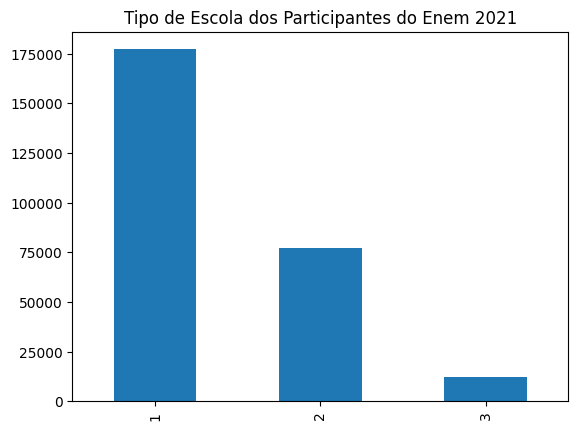

In [173]:
df.TP_ESCOLA.value_counts().plot(kind = 'bar')
plt.title('Tipo de Escola dos Participantes do Enem 2021')

Text(0, 0.5, 'Quantidade')

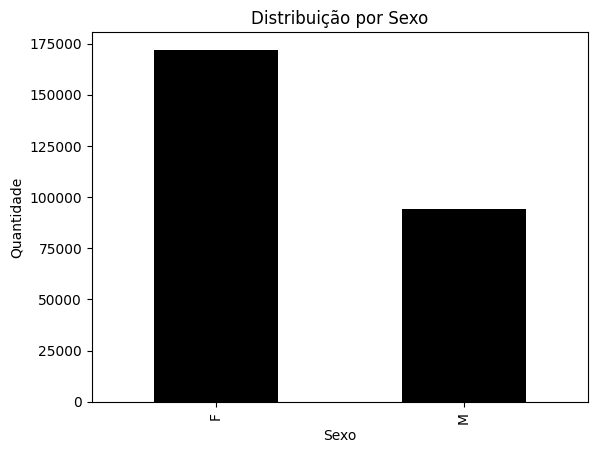

In [174]:
# Gráfico de barras
df.TP_SEXO.value_counts().plot(kind = 'bar', color = 'black')

# Adicionando título
plt.title('Distribuição por Sexo')

# Label do eixo X
plt.xlabel('Sexo')

# Label do eixo Y
plt.ylabel('Quantidade')

<Axes: title={'center': 'Top 15 municípios baianos com maior números de inscritos no ENEM 2021'}, xlabel='Quantidade', ylabel='Municipio'>

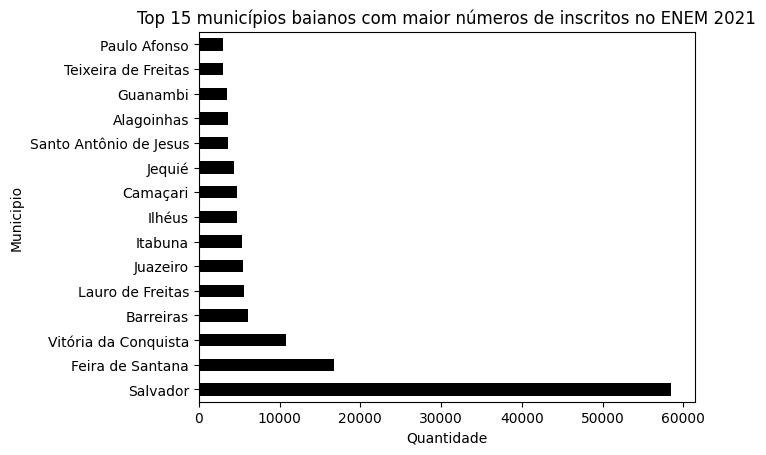

In [175]:
# Municípios com a maior quantidade de inscritos

(
    df.NO_MUNICIPIO_PROVA
    .value_counts()
    .reset_index()
    .rename(columns = {'index': 'Municipio', 'NO_MUNICIPIO_PROVA': 'Quantidade'})
    .nlargest(n = 15, columns = 'Quantidade')
    .set_index('Municipio')
    .plot(
        kind = 'barh',
        color = 'black',
        legend = False,
        xlabel = 'Quantidade',
        ylabel = 'Municipio',
        title = 'Top 15 municípios baianos com maior números de inscritos no ENEM 2021'
    )
 )

<Axes: ylabel='TP_ESCOLA'>

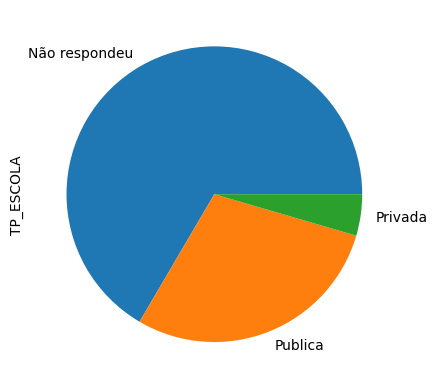

In [176]:
# Gráfico de pizza

(
    df.TP_ESCOLA.map({1: 'Não respondeu', 2: 'Publica', 3: 'Privada'})
    .value_counts()
    .plot(
        kind = 'pie'
    )
)

<Axes: xlabel='NU_NOTA_MT', ylabel='NU_NOTA_CN'>

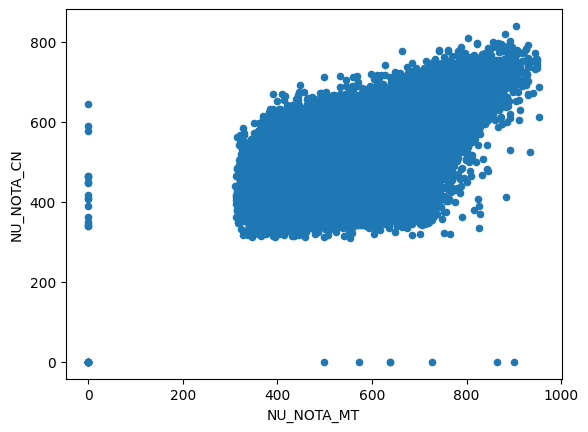

In [177]:
# Gráfico de dispersão
# Notas de Matemática e Ciências da Natureza

df.plot(kind = 'scatter', x = 'NU_NOTA_MT', y = 'NU_NOTA_CN')

<Axes: ylabel='Frequency'>

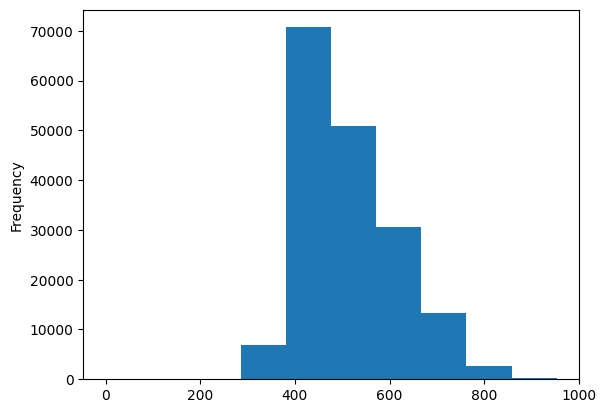

In [178]:
# Gráfico de histograma

df.NU_NOTA_MT.plot(kind = 'hist')

<Axes: >

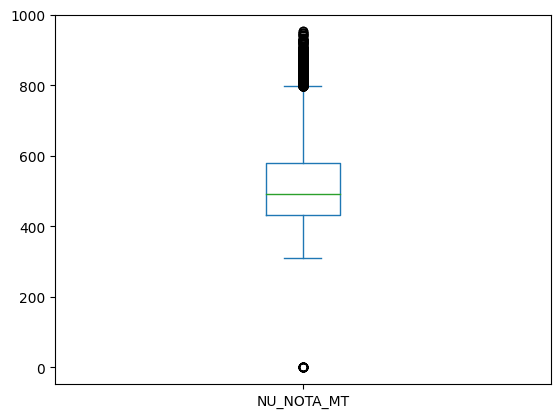

In [179]:
# Gráfico de bloxpot

df.NU_NOTA_MT.plot(kind = 'box')

<Axes: >

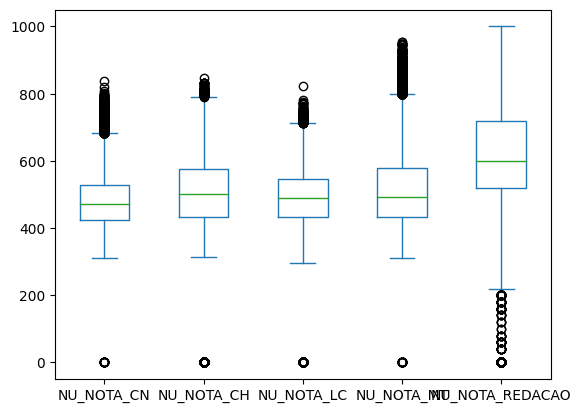

In [180]:
df[provas].plot(kind = 'box')

<Axes: ylabel='Density'>

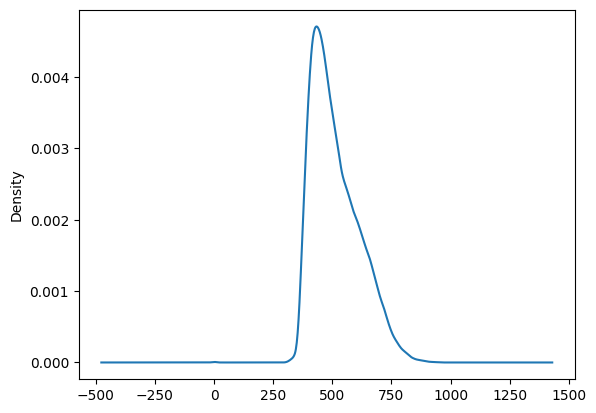

In [181]:
# Gráfico de KDE (Densidade)

df.NU_NOTA_MT.plot(kind = 'kde')

<Axes: title={'center': 'Nota média em matemática por município'}, xlabel='Municipio', ylabel='Média em Matemática'>

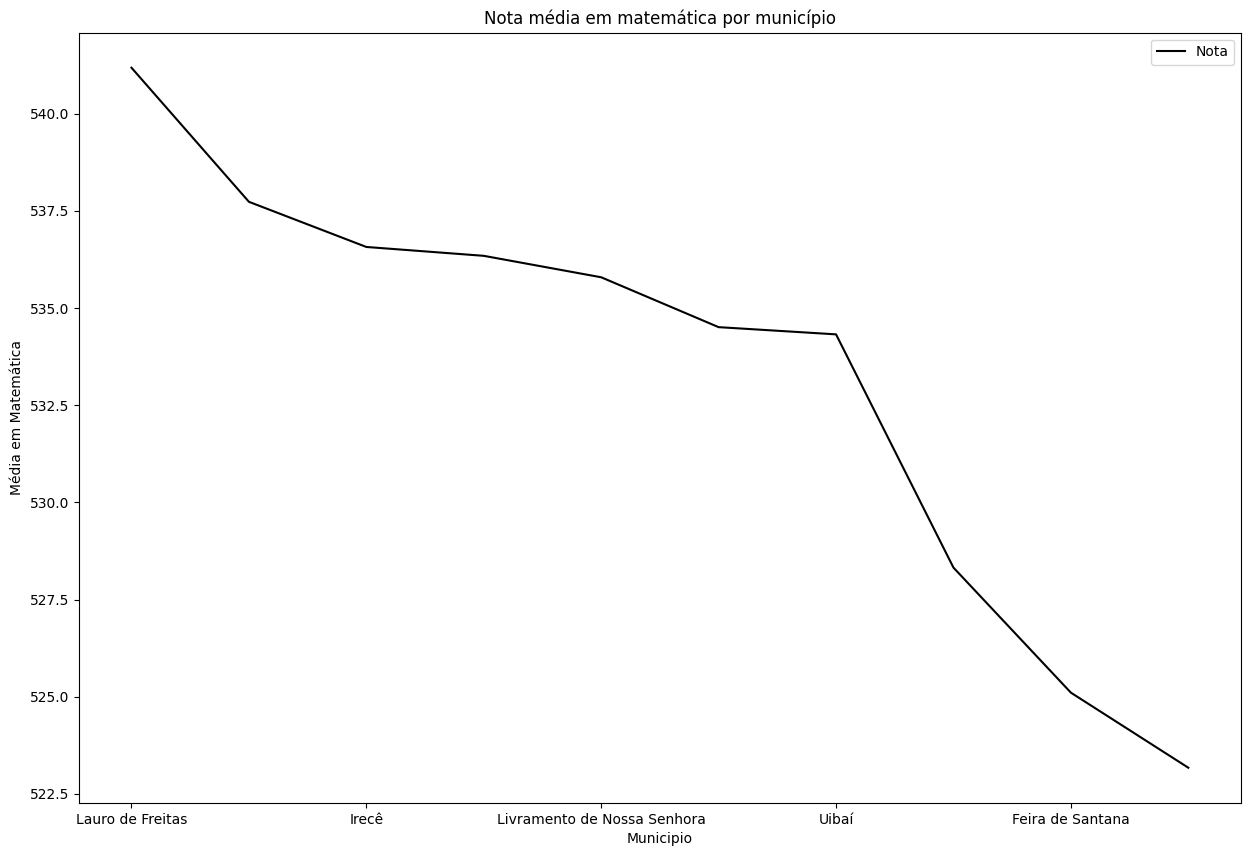

In [182]:
# Gráfico de linhas

(
    df
    .groupby(by = ['NO_MUNICIPIO_PROVA'])
    .agg({'NU_NOTA_MT': np.mean})
    .reset_index()
    .rename(columns = {'NU_NOTA_MT': 'Nota', 'NO_MUNICIPIO_PROVA': 'Municipio'})
    .nlargest(n = 10, columns = 'Nota')
    .plot(
        x =       'Municipio',
        y =       'Nota',
        figsize = (15, 10),
        color =   'k',
        ylabel =  'Média em Matemática',
        title =   'Nota média em matemática por município'
    )
)

# **Ordenação**

In [183]:
# Comando .sort_values()

provas = df.columns[(df.columns.str.contains('NOTA')) & (~df.columns.str.contains('COMP'))].to_list()
idCandidato = ['NU_INSCRICAO']

In [184]:
df_subset = df[idCandidato+provas].sample(n = 10, random_state = 9999)

In [185]:
# Ordena o dataset em order decrescente

df_subset.sort_values(by = ['NU_NOTA_MT'], ascending=False)

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
227398,210051715408,590.7,665.7,559.3,729.0,720.0
124717,210053777121,601.0,500.9,469.7,582.6,860.0
171946,210051590720,480.9,539.5,544.2,582.4,740.0
168634,210054247453,536.5,564.3,491.4,493.1,0.0
451,210053811122,396.0,427.9,469.9,460.8,360.0
212050,210052725187,361.3,395.5,433.9,427.3,380.0
53444,210051472302,435.4,553.1,432.1,424.8,640.0
171654,210051356897,468.6,500.2,422.8,354.5,380.0
255118,210053165833,NaN,NaN,NaN,NaN,NaN
57913,210053712582,NaN,NaN,NaN,NaN,NaN


In [186]:
# Ordena o dataset em order crescente

df_subset.sort_values(by = ['NU_NOTA_MT'], ascending=True)

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
171654,210051356897,468.6,500.2,422.8,354.5,380.0
53444,210051472302,435.4,553.1,432.1,424.8,640.0
212050,210052725187,361.3,395.5,433.9,427.3,380.0
451,210053811122,396.0,427.9,469.9,460.8,360.0
168634,210054247453,536.5,564.3,491.4,493.1,0.0
171946,210051590720,480.9,539.5,544.2,582.4,740.0
124717,210053777121,601.0,500.9,469.7,582.6,860.0
227398,210051715408,590.7,665.7,559.3,729.0,720.0
255118,210053165833,NaN,NaN,NaN,NaN,NaN
57913,210053712582,NaN,NaN,NaN,NaN,NaN


In [187]:
# Podemos definir onde queremos inserir os valores ausentes com o comando na_position

df_subset.sort_values(by = ['NU_NOTA_MT'], na_position = 'first', ascending=False)

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
255118,210053165833,NaN,NaN,NaN,NaN,NaN
57913,210053712582,NaN,NaN,NaN,NaN,NaN
227398,210051715408,590.7,665.7,559.3,729.0,720.0
124717,210053777121,601.0,500.9,469.7,582.6,860.0
171946,210051590720,480.9,539.5,544.2,582.4,740.0
168634,210054247453,536.5,564.3,491.4,493.1,0.0
451,210053811122,396.0,427.9,469.9,460.8,360.0
212050,210052725187,361.3,395.5,433.9,427.3,380.0
53444,210051472302,435.4,553.1,432.1,424.8,640.0
171654,210051356897,468.6,500.2,422.8,354.5,380.0


In [188]:
# Ordenar por mais de uma coluna

df_subset.sort_values(by = ['NU_NOTA_MT', 'NU_NOTA_CN'], ascending=[False, False])

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
227398,210051715408,590.7,665.7,559.3,729.0,720.0
124717,210053777121,601.0,500.9,469.7,582.6,860.0
171946,210051590720,480.9,539.5,544.2,582.4,740.0
168634,210054247453,536.5,564.3,491.4,493.1,0.0
451,210053811122,396.0,427.9,469.9,460.8,360.0
212050,210052725187,361.3,395.5,433.9,427.3,380.0
53444,210051472302,435.4,553.1,432.1,424.8,640.0
171654,210051356897,468.6,500.2,422.8,354.5,380.0
255118,210053165833,NaN,NaN,NaN,NaN,NaN
57913,210053712582,NaN,NaN,NaN,NaN,NaN


In [189]:
# Ordenando uma Series.
# Series é quando temos apenas uma coluna no dataset

type(df.NU_NOTA_MT)

pandas.core.series.Series

In [190]:
df_subset.NU_NOTA_MT.sort_values()

171654    354.5
53444     424.8
212050    427.3
451       460.8
168634    493.1
171946    582.4
124717    582.6
227398    729.0
255118      NaN
57913       NaN
Name: NU_NOTA_MT, dtype: float64

In [191]:
df_subset.NU_NOTA_MT.sort_values(ascending=True, na_position = 'first')

255118      NaN
57913       NaN
171654    354.5
53444     424.8
212050    427.3
451       460.8
168634    493.1
171946    582.4
124717    582.6
227398    729.0
Name: NU_NOTA_MT, dtype: float64

In [192]:
# Criando um ranking dos candidatos que fizeram a prova em Salvador, considerando os top 10 em Matemática

df_subset = df.query('NO_MUNICIPIO_PROVA == "Salvador"')[idCandidato+provas]
df_subset

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
1,210054173438,NaN,NaN,NaN,NaN,NaN
6,210053741476,453.4,438.3,503.4,379.5,600.0
9,210054171092,NaN,NaN,NaN,NaN,NaN
14,210053702687,603.3,622.5,571.7,729.2,860.0
17,210054087112,414.6,420.5,368.6,399.4,480.0
...,...,...,...,...,...,...
266183,210053939844,NaN,NaN,NaN,NaN,NaN
266188,210054023670,463.8,474.9,333.3,357.8,280.0
266191,210051995005,NaN,NaN,NaN,NaN,NaN
266192,210053234415,NaN,NaN,NaN,NaN,NaN


In [193]:
df_subset.sort_values(by = ['NU_NOTA_MT'], ascending=False).iloc[:11, :]

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
135490,210052672394,687.5,697.3,664.3,953.1,700.0
40487,210053271130,751.0,720.4,661.1,948.5,900.0
4954,210053763665,754.6,698.1,685.8,944.1,920.0
173100,210053596696,730.8,752.1,684.6,944.1,940.0
97902,210054079727,741.1,707.9,755.7,930.1,940.0
118896,210054147919,758.4,752.8,679.7,930.1,960.0
222974,210053348040,739.3,684.5,665.9,929.8,880.0
76017,210052520408,741.7,705.8,655.4,929.8,740.0
77165,210054118249,667.7,681.3,652.5,928.8,860.0
125578,210053255151,719.5,692.4,647.9,926.8,980.0


In [194]:
# Outra maneira de fazer o ranking é utilizar o comando nlargest
# Para análise contrária, podemos utilizar o comando nsmallest

df_subset.nlargest(n = 10, columns = 'NU_NOTA_MT')

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
135490,210052672394,687.5,697.3,664.3,953.1,700.0
40487,210053271130,751.0,720.4,661.1,948.5,900.0
4954,210053763665,754.6,698.1,685.8,944.1,920.0
173100,210053596696,730.8,752.1,684.6,944.1,940.0
97902,210054079727,741.1,707.9,755.7,930.1,940.0
118896,210054147919,758.4,752.8,679.7,930.1,960.0
76017,210052520408,741.7,705.8,655.4,929.8,740.0
222974,210053348040,739.3,684.5,665.9,929.8,880.0
77165,210054118249,667.7,681.3,652.5,928.8,860.0
50793,210051245410,717.1,774.0,669.3,926.8,920.0


In [195]:
# Podemos fazer o ranking por mais de uma coluna, o que é interessante caso aja um empate na coluna principal

df_subset.sort_values(by = ['NU_NOTA_MT', 'NU_NOTA_CN'], ascending=False).iloc[: 10, :]

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
135490,210052672394,687.5,697.3,664.3,953.1,700.0
40487,210053271130,751.0,720.4,661.1,948.5,900.0
4954,210053763665,754.6,698.1,685.8,944.1,920.0
173100,210053596696,730.8,752.1,684.6,944.1,940.0
118896,210054147919,758.4,752.8,679.7,930.1,960.0
97902,210054079727,741.1,707.9,755.7,930.1,940.0
76017,210052520408,741.7,705.8,655.4,929.8,740.0
222974,210053348040,739.3,684.5,665.9,929.8,880.0
77165,210054118249,667.7,681.3,652.5,928.8,860.0
125578,210053255151,719.5,692.4,647.9,926.8,980.0


In [196]:
# O comando keep é útil para remover o registro caso aja duplicidade
df_subset.nlargest(n = 10, columns = ['NU_NOTA_MT', 'NU_NOTA_CN'], keep = 'first')

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
135490,210052672394,687.5,697.3,664.3,953.1,700.0
40487,210053271130,751.0,720.4,661.1,948.5,900.0
4954,210053763665,754.6,698.1,685.8,944.1,920.0
173100,210053596696,730.8,752.1,684.6,944.1,940.0
118896,210054147919,758.4,752.8,679.7,930.1,960.0
97902,210054079727,741.1,707.9,755.7,930.1,940.0
76017,210052520408,741.7,705.8,655.4,929.8,740.0
222974,210053348040,739.3,684.5,665.9,929.8,880.0
77165,210054118249,667.7,681.3,652.5,928.8,860.0
125578,210053255151,719.5,692.4,647.9,926.8,980.0


# **Índice**

In [197]:
# É possível setar um índice em um dataset

df_subset.set_index('NU_INSCRICAO', inplace = True)

In [198]:
# Ordenar pelo indice

df_subset.sort_index().head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
NU_INSCRICAO,,,,,
210051014333,NaN,NaN,NaN,NaN,NaN
210051014348,NaN,NaN,NaN,NaN,NaN
210051014437,NaN,NaN,NaN,NaN,NaN
210051014463,NaN,NaN,NaN,NaN,NaN
210051014490,596.3,615.3,628.1,621.6,700.0


In [199]:
df_subset.reset_index(drop=False)

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,210054173438,NaN,NaN,NaN,NaN,NaN
1,210053741476,453.4,438.3,503.4,379.5,600.0
2,210054171092,NaN,NaN,NaN,NaN,NaN
3,210053702687,603.3,622.5,571.7,729.2,860.0
4,210054087112,414.6,420.5,368.6,399.4,480.0
...,...,...,...,...,...,...
58497,210053939844,NaN,NaN,NaN,NaN,NaN
58498,210054023670,463.8,474.9,333.3,357.8,280.0
58499,210051995005,NaN,NaN,NaN,NaN,NaN
58500,210053234415,NaN,NaN,NaN,NaN,NaN
